# Round 3: Trade baskets

In [31]:
from Utils.Config import DATA_DIR
from Utils.Config import CHARTS_DIR
from Utils import dataUtils
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [32]:
files = dataUtils.getDataPaths(3)
dfs = dataUtils.concat_dfs("prices",files)
dfs

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,CHOCOLATE,7999,111,NaN,NaN,NaN,NaN,8001,111,NaN,NaN,NaN,NaN,8000.0,0.0
1,0,0,STRAWBERRIES,3999,210,NaN,NaN,NaN,NaN,4001,210,NaN,NaN,NaN,NaN,4000.0,0.0
2,0,0,ROSES,14999,72,NaN,NaN,NaN,NaN,15001,72,NaN,NaN,NaN,NaN,15000.0,0.0
3,0,0,GIFT_BASKET,71348,19,71347.0,24.0,NaN,NaN,71362,19,71363.0,24.0,NaN,NaN,71355.0,0.0
4,0,100,GIFT_BASKET,71344,1,71343.0,12.0,71342.0,20.0,71355,1,71356.0,12.0,71357.0,20.0,71349.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,2,999800,GIFT_BASKET,69537,2,69536.0,18.0,69535.0,24.0,69547,2,69548.0,18.0,69550.0,24.0,69542.0,0.0
119996,2,999900,CHOCOLATE,7749,143,NaN,NaN,NaN,NaN,7751,143,NaN,NaN,NaN,NaN,7750.0,0.0
119997,2,999900,GIFT_BASKET,69551,1,69550.0,19.0,69549.0,20.0,69561,1,69562.0,19.0,69564.0,20.0,69556.0,0.0
119998,2,999900,STRAWBERRIES,3984,240,NaN,NaN,NaN,NaN,3985,92,3986.0,148.0,NaN,NaN,3984.5,0.0


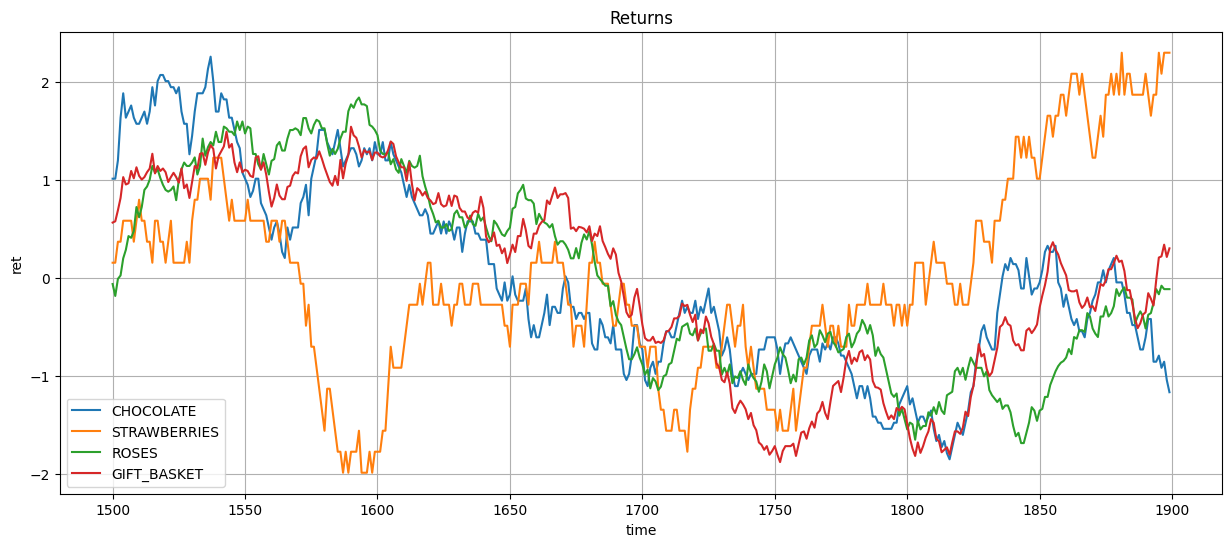

In [57]:
products = list(dfs["product"].unique())
portfolio_opt = {}
for i in products:
    portfolio_opt[i] = dfs[dfs["product"] == i].mid_price.values

returns_df = pd.DataFrame(portfolio_opt)[1500:1900]
df_normalized = (returns_df - returns_df.mean()) / returns_df.std()
x = df_normalized.index
plt.figure(figsize=(15, 6))
for col in df_normalized.columns:
    plt.plot(x, df_normalized[col], label=col)

plt.xlabel('time')
plt.ylabel('ret')
plt.title('Returns')
plt.legend()
plt.grid(True)

> Observations:
- 1. Strawberries are not very liquid -> we can take savgol filter and trade volatility
- 2. Chocolate and GiftBasket are very cointegrated and can me used to pair trade


## Pairs Trading

<Axes: >

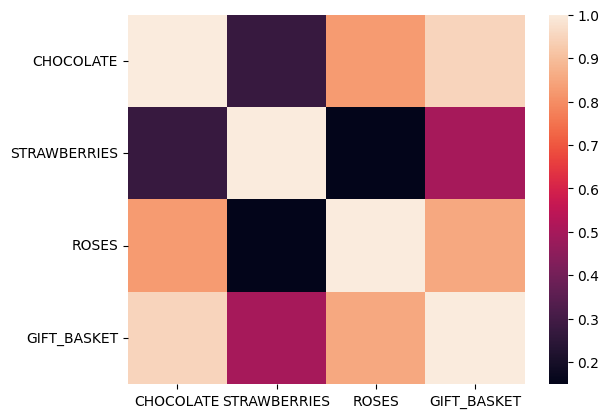

In [48]:
corr = df_normalized.corr()
sns.heatmap(corr)

> Chocolate is very correlated with the gift basket or benchmark.
Chocolate vs roses are a pair that can be traded

Run a Linear Reg to see if we can predict price of 